# VMware EXSi Visualisations 0

In [1]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

We get the json file with the information from: https://wmwaredata.s3.us-east-2.amazonaws.com/machines.json

In [3]:
url = 'https://wmwaredata.s3.us-east-2.amazonaws.com/machines.json'
r = requests.get(url, allow_redirects=True)
open('data/machines.json', 'wb').write(r.content)

4213

In [4]:
json_file = 'data/machines.json' 
df = pd.read_json(json_file)
df

,BootTime,CommitedSpace,ConnectionState,CreateDate,Folder,Guest,GuestId,HardwareVersion,IPAddress,Id,...,MemoryMB,Name,Notes,NumCpu,NumVirtualDisks,PowerState,UNCommitedSpace,Uid,VMHost,Version
0,2021-01-07 13:36:24.248327+00:00,23708312044,connected,2021-01-07 13:36:24.265589+00:00,[datastore1] OPNsense/OPNsense.vmx,OPNsense,freebsd12_64Guest,NaN,None,564d29f0-0330-cbe9-ff62-322e2a8e89b0,...,2048,OPNsense,dont_delete,2,1,poweredOn,23708312044,521d330d-04c0-11d5-be0e-7818cfbb2407,'vim.HostSystem:ha-host',vmx-14
1,2021-01-07 12:46:35.839761+00:00,19411509752,connected,2021-01-07 12:56:34.440633+00:00,[datastore1] centos-testing/centos-testing.vmx,centos-testing,centos8_64Guest,NaN,91.109.25.76,564de62b-3ba3-d95e-e043-7c3c3835c472,...,2048,centos-testing,dont_delete,1,1,poweredOn,19411509752,522fb36e-4a08-5a8f-7812-1b0d1ceb535b,'vim.HostSystem:ha-host',vmx-14
2,2021-01-07 20:44:42.339006+00:00,2231640568,connected,2021-01-07 20:44:42.355188+00:00,[datastore1] TestInstallation/TestInstallation...,TestInstallation,centos8_64Guest,NaN,91.109.25.81,564d403b-69bb-ef7e-07a2-e064461cea9f,...,2048,TestInstallation,dont_delete,1,1,poweredOn,2231640568,52de03ee-c829-7e4f-36e8-f5ec021d408a,'vim.HostSystem:ha-host',vmx-14
3,2021-01-28 10:26:29.091690+00:00,571330083782,connected,2021-01-28 10:26:29.109800+00:00,[datastore1] logtrixia/logtrixia.vmx,logtrixia,ubuntu64Guest,NaN,91.109.26.22,564d4d69-9038-90dd-030e-102a7251d021,...,32768,logtrixia,dont_delete,8,1,poweredOn,571330083782,,'vim.HostSystem:ha-host',vmx-13
4,None,52428811647,connected,2021-01-21 17:50:38.270450+00:00,[datastore1] packer-proxy-rebuild/packer-proxy...,packer-proxy-rebuild,ubuntu64Guest,NaN,None,,...,8192,packer-proxy-rebuild,,2,1,poweredOff,52428811647,,'vim.HostSystem:ha-host',vmx-13


## Power State

In [5]:
df.PowerState.value_counts()

poweredOn     4
poweredOff    1
Name: PowerState, dtype: int64

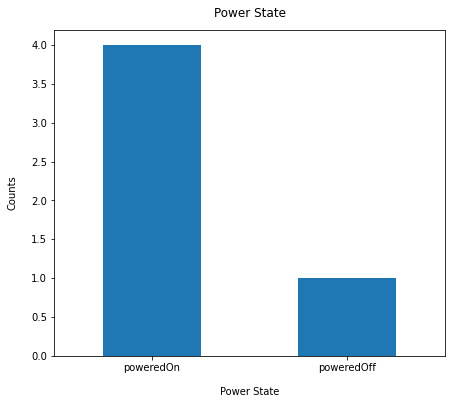

In [6]:
df.PowerState.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Power State", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Power State", y=1.02);

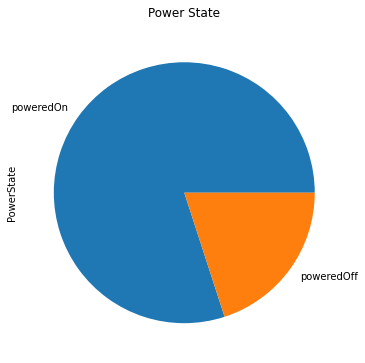

In [7]:
df.PowerState.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Power State", y=1.02);

## Connection State

In [8]:
df.ConnectionState.value_counts()

connected    5
Name: ConnectionState, dtype: int64

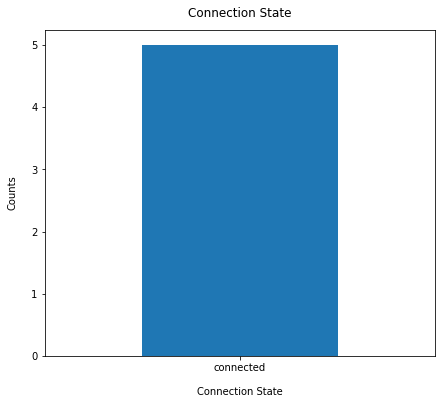

In [9]:
df.ConnectionState.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Connection State", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Connection State", y=1.02);

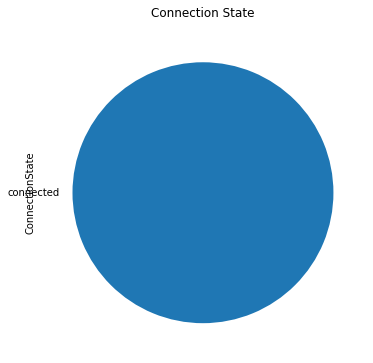

In [10]:
df.ConnectionState.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Connection State", y=1.02);

## Number of CPUs

In [11]:
df.NumCpu.value_counts()

2    2
1    2
8    1
Name: NumCpu, dtype: int64

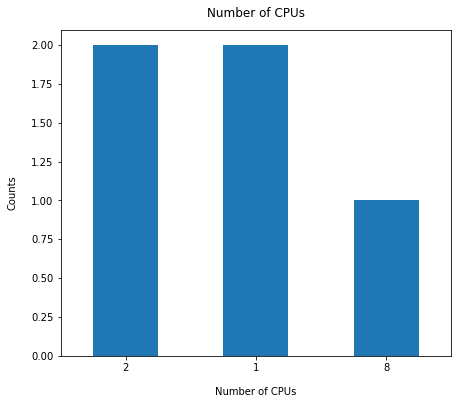

In [12]:
df.NumCpu.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Number of CPUs", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Number of CPUs", y=1.02);

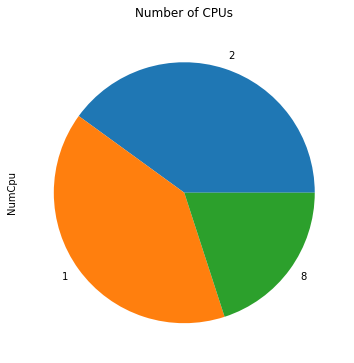

In [13]:
df.NumCpu.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Number of CPUs", y=1.02);

##  Number of Virtual Disks

In [14]:
df.NumVirtualDisks.value_counts()

1    5
Name: NumVirtualDisks, dtype: int64

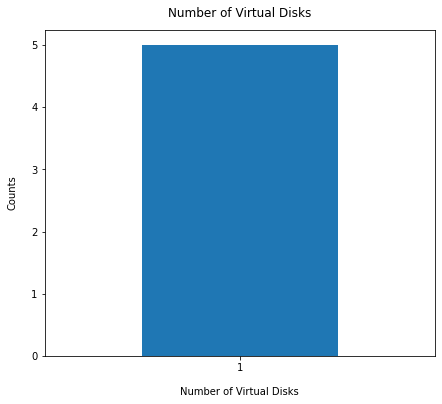

In [15]:
df.NumVirtualDisks.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Number of Virtual Disks", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Number of Virtual Disks", y=1.02);

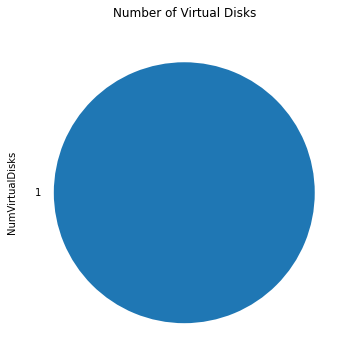

In [16]:
df.NumVirtualDisks.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Number of Virtual Disks", y=1.02);

## Memory

In [17]:
df.MemoryMB.value_counts()

2048     3
8192     1
32768    1
Name: MemoryMB, dtype: int64

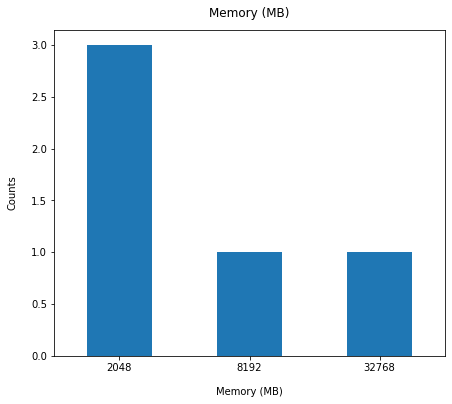

In [18]:
df.MemoryMB.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Memory (MB)", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Memory (MB)", y=1.02);

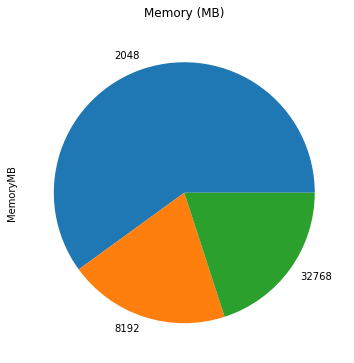

In [19]:
df.MemoryMB.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Memory (MB)", y=1.02);

[comment]: <> (## Provisioned Space)

In [20]:
#xint = [x for x in range(len(df))]
#y = np.asarray(df.ProvisionedSpaceGB)
#plt.figure(figsize=(10, 6))
#plt.plot(y, 'o-', color='black')
#plt.xticks(xint)
#plt.xlabel("VM", labelpad=14)
#plt.ylabel("Provisioned Space (GB)", labelpad=14)
#plt.title("Provisioned Space (GB)", y=1.02);

[comment]: <> (## Used Space)

In [21]:
#y = np.asarray(df.UsedSpaceGB)
#plt.figure(figsize=(10, 6))
#plt.plot(y, 'o-', color='black')
#plt.xticks(xint)
#plt.xlabel("VM", labelpad=14)
#plt.ylabel("Used Space (GB)", labelpad=14)
#plt.title("Used Space (GB)", y=1.02);

## Commited and Uncommited Space

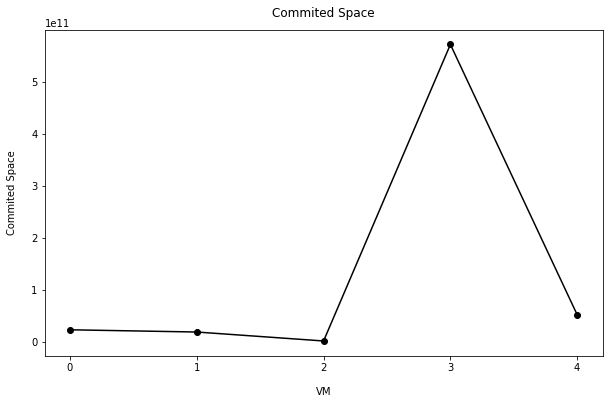

In [22]:
xint = [x for x in range(len(df))]
y = np.asarray(df.CommitedSpace)
plt.figure(figsize=(10, 6))
plt.plot(y, 'o-', color='black')
plt.xticks(xint)
plt.xlabel("VM", labelpad=14)
plt.ylabel("Commited Space", labelpad=14)
plt.title("Commited Space", y=1.02);

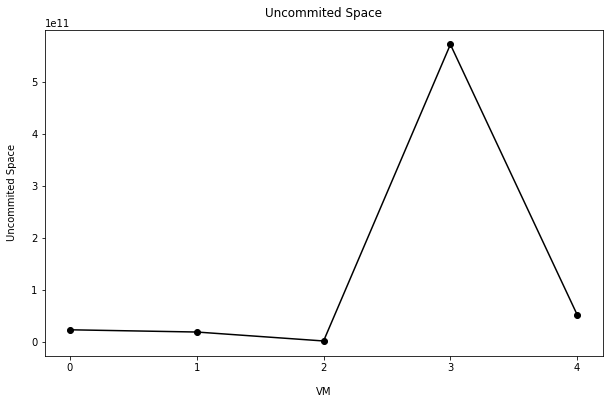

In [23]:
y = np.asarray(df.UNCommitedSpace)
plt.figure(figsize=(10, 6))
plt.plot(y, 'o-', color='black')
plt.xticks(xint)
plt.xlabel("VM", labelpad=14)
plt.ylabel("Uncommited Space", labelpad=14)
plt.title("Uncommited Space", y=1.02);